In [1]:
%matplotlib inline
%run analyze_traj.py
data_dir='/home/amichaut/Desktop/charlene/data/sub25'
df=get_data(data_dir,refresh=False)
df2=filter_by_traj_len(df,min_traj_len=25)
parallelize=False

In [3]:
#### PLOT VFIELD
if parallelize:
    num_cores = multiprocessing.cpu_count()
    Parallel(n_jobs=num_cores)(delayed(run)(cur_dir,refresh=refresh,interactive=interactive,plot_frame=plot_frame,plot_data=plot_data,plot_modified_tracks=plot_modified_tracks,plot_all_traj=plot_all_traj,plot_persistence=plot_persistence) for cur_dir in dir_list)

groups=df2.groupby('frame')
for frame in df['frame'].unique():
    avg_vfield=plot_frame_vfield(df,groups,frame,data_dir,avg_grid=10,plot_field=False)
    div=plot_frame_div(df,groups,frame,data_dir,avg_vfield)

plotting frame 24.0


In [ ]:
#### PLOT TRAJ

# tracks=df.groupby('traj')
# long_tracks=[]
# for t in df['traj'].unique():
#     track=tracks.get_group(t)
#     if track.shape[0]==25:
#         long_tracks.append(t)
# print len(long_tracks)
z_lim=[df['z_rel'].min(),df['z_rel'].max()]
groups=df.groupby('frame')
for frame in df['frame'].unique():
    plot_frame_cells(df,groups,frame,data_dir,z_lim=z_lim,plot_traj=True,hide_labels=True)


plotting frame 6.0

In [60]:
#### GENERATE SYNTHETIC DATA

part_num=10
frame_num=25
x0=10;y0=10;z0=10
xmax=100;ymax=100;zmax=100;
shift=50
traj=array([]);frame=array([]);x=array([]);y=array([]);z=array([])
for i in range(part_num):
    traj=np.concatenate((traj,ones(frame_num)*i))
    frame=np.concatenate((frame,arange(frame_num)))
    x=np.concatenate((x,linspace(x0,xmax,frame_num)))
    y=np.concatenate((y,linspace(y0+i*shift,ymax+i*shift,frame_num)))
    z=np.concatenate((z,linspace(z0,zmax,frame_num)))

a=np.vstack([arange(frame_num*part_num),traj,frame,x,y,z,zeros((6,frame_num*part_num))]).T
    
df=pd.DataFrame(a,columns=['i','traj','frame','x','y','z','m0','m1','m2','m3','m4','NPscore'])
savetxt('test_data.txt',a,delimiter='\t')

[-1, 7, -1, 7]

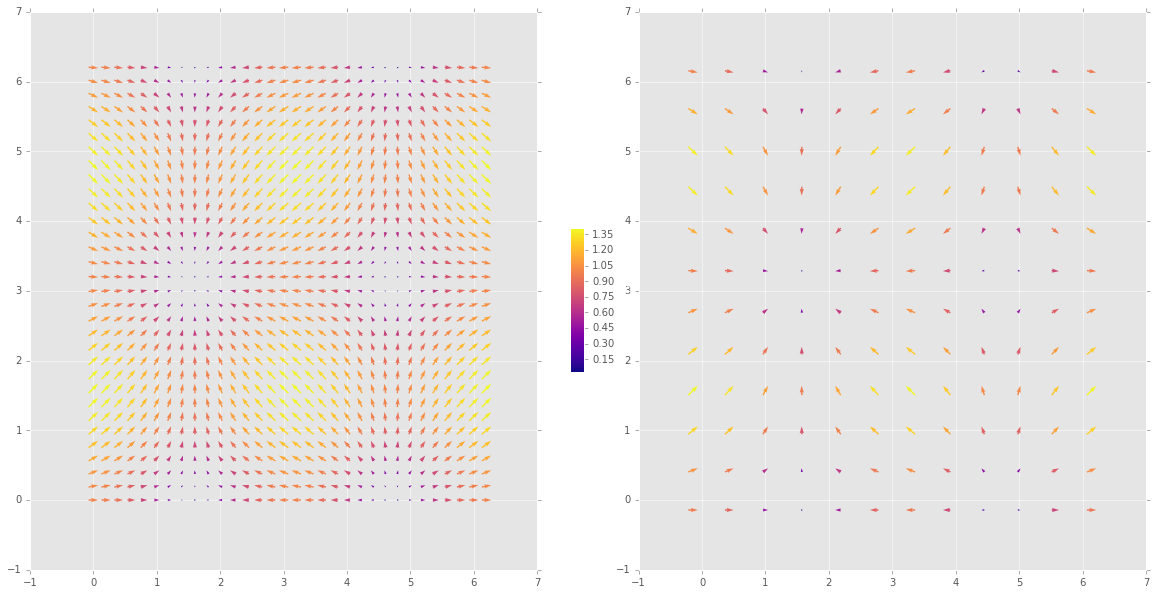

In [91]:
### TEST QUIVER

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(20, 10))
M = np.hypot(U, V)
Q = ax.quiver(X, Y, U, V, M,
               units='x',
               pivot='mid',
               width=0.022,
               scale=1 / 0.15,
              cmap='plasma')

xmin, ymin, xmax, ymax=ax.axis()

cbaxes = fig.add_axes([0.5, 0.4, 0.01, 0.2]) 
cbar = fig.colorbar(Q,cax = cbaxes,label='$v_z\ (\mu m.min^{-1})$')
cbaxes.yaxis.label.set_color('white')
ax.axis([-1, 7, -1, 7])

### average grid

a=hstack([X.reshape(32*32,1),Y.reshape(32*32,1),U.reshape(32*32,1),V.reshape(32*32,1),M.reshape(32*32,1)])
df=pd.DataFrame(a,columns=['x','y','vx','vy','vz'])

#make subgrid
res=15
xmin, xmax, ymin, ymax = [-1, 7, -1, 7]
xsubgrid=linspace(xmin,xmax,res);ysubgrid=linspace(ymin,ymax,res)
X=[];Y=[];VX=[];VY=[];VZ=[] #new data
for i,xg in enumerate(xsubgrid[:-1]):
    for j,yg in enumerate(ysubgrid[:-1]):
        xg1=xsubgrid[i+1];yg1=ysubgrid[j+1]
        ind=((df['x']>=xg) & (df['x']<xg1) & (df['y']>=yg) & (df['y']<yg1))
        VX.append(df[ind]['vx'].mean());VY.append(df[ind]['vy'].mean());VZ.append(df[ind]['vz'].mean())
        X.append(xg+(xg1-xg)*0.5);Y.append(yg+(yg1-yg)*0.5) #center of the cell

Q = ax1.quiver(X,Y,VX,VY,VZ,
               units='x',
               pivot='mid',
               width=0.022,
               scale=1 / 0.15,
              cmap='plasma')

ax1.axis([-1, 7, -1, 7])

In [70]:
%run analyze_traj.py
avg_vfields=get_avg_vfields(data_dir)

In [49]:
plot_all_frame(plot_frame_mean_vel,df,data_dir,avg_vfields=avg_vfields)

plotting frame 24.0

In [41]:
mean=plot_frame_mean_vel(df,groups,24,data_dir,avg_vfields['vfield_list'][24])

plotting frame 24


In [45]:
mean_vel_masked = np.ma.array (mean, mask=np.isnan(mean))

In [53]:
a=None
b=mean_vel_masked.max()

In [ ]:
def get_vlim(plot_func,df,data_dir,avg_vfields,**kwargs):
    vmin=None;vmax=None
    for i,frame enumerate(avg_vfields['frame_list']):
        data=plot_func(df,groups,frame,data_dir,avg_vfields['vfield_list'][i],plot_field=False,**kwargs)
        vmin=min(vmin,data.min());max

In [75]:
vlim=get_vlim(plot_frame_mean_vel,df,data_dir,avg_vfields)

plotting frame 24.0


In [76]:
vlim

[0.0053652925399091302, 1.1561585742812417]

In [ ]:
plot_all_frame(plot_frame_mean_vel,df,data_dir,avg_vfields=avg_vfields,fixed_vlim=vlim)

plotting frame 7.0